In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('ipl_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          756 non-null    ob

In [4]:
df.describe()

id       Season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [7]:
print(df['team1'].value_counts())
print(df['team2'].value_counts())


team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: count, dtype: int64
team2
Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant       

In [12]:
df.head(5)

id  Season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong  Unknown  
1  A Nand Kishore         S Ravi  Unknown  
2     Nitin Menon      CK Nandan  Unknown  
3    AK Chaudhary  C Shamshuddin  Unknown  
4         Unknown        Unknown  Unknown

Text(0.5, 1.0, 'Heat map-Correlation')

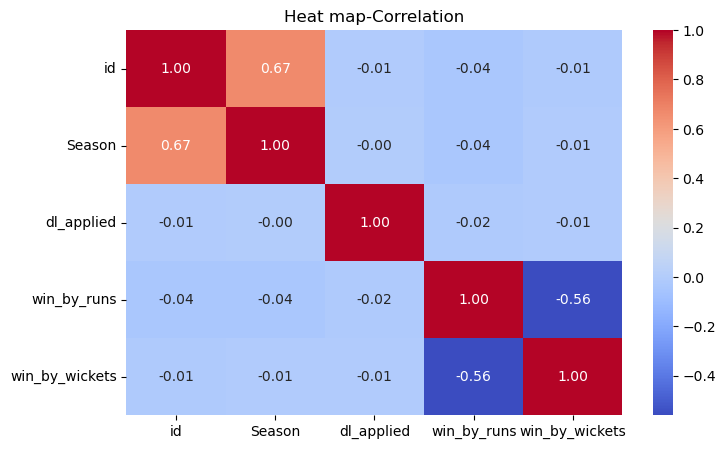

In [27]:
plt.figure(figsize=(8,5))
correlation=df.select_dtypes(include=[float,int]).corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heat map-Correlation')

<Axes: xlabel='result', ylabel='count'>

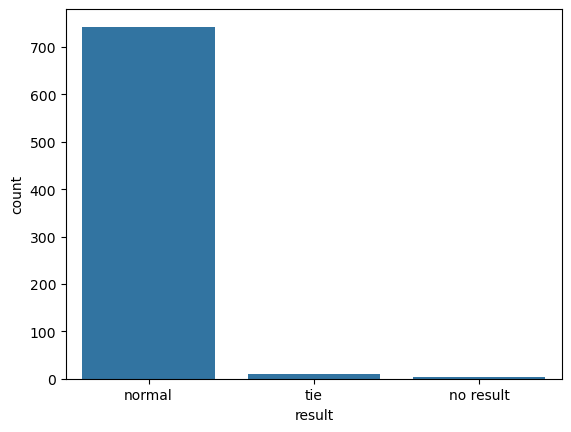

In [13]:
sns.countplot(x='result',data=df)

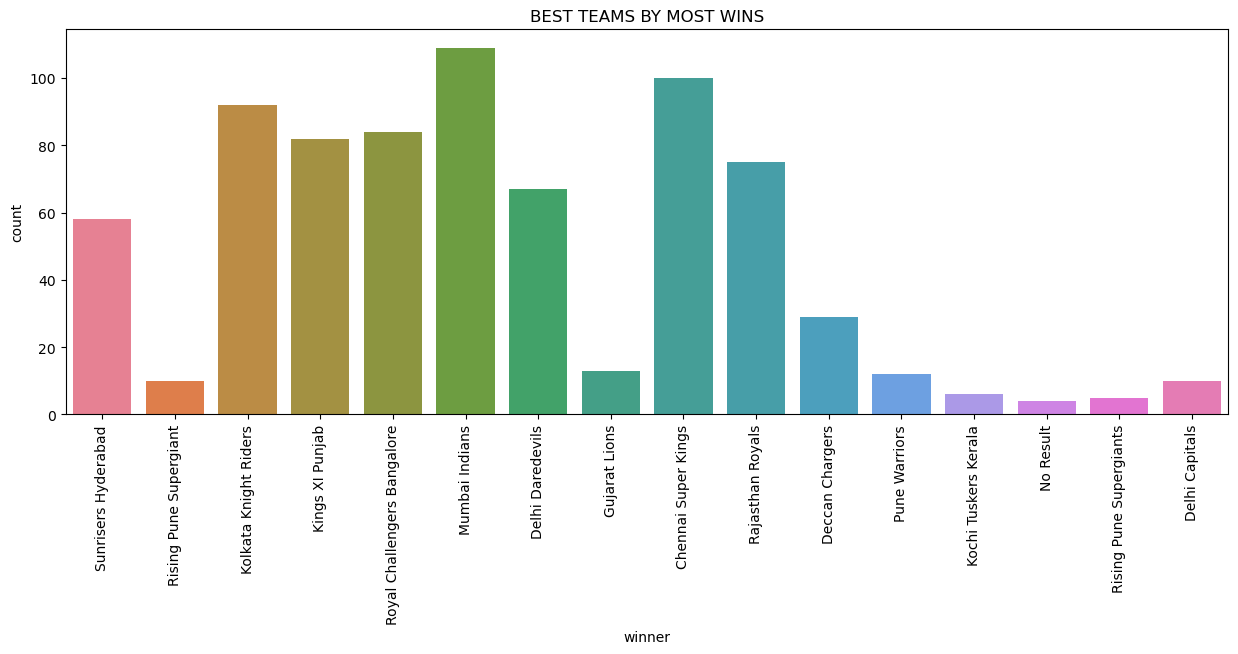

In [4]:
plt.figure(figsize=[15,5])
sns.countplot(x='winner',data=df,hue='winner')
plt.xticks(rotation=90)
plt.title('BEST TEAMS BY MOST WINS')
plt.show()

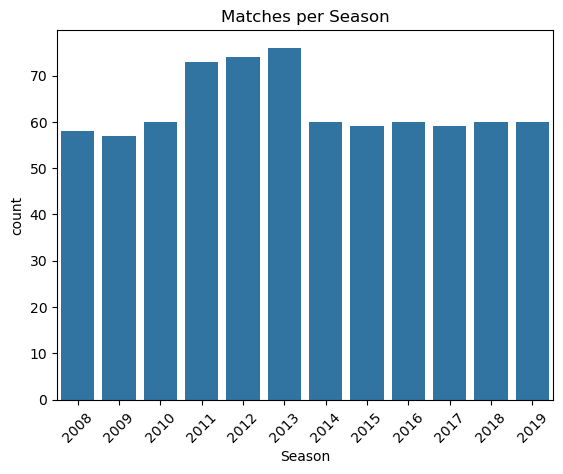

In [28]:
sns.countplot(x='Season', data=df)
plt.title('Matches per Season')
plt.xticks(rotation=45)
plt.show()


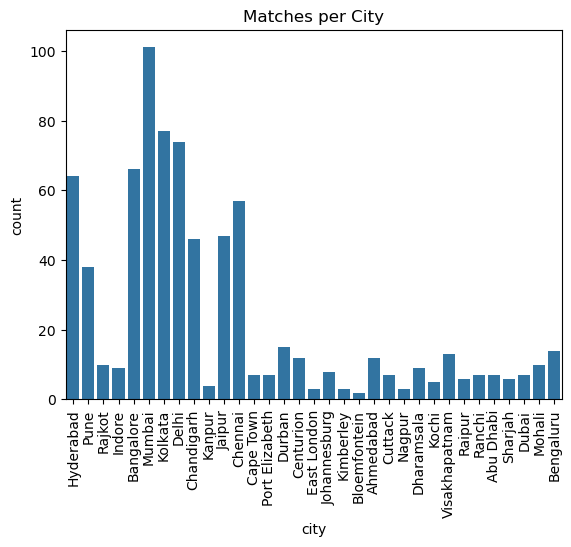

In [32]:
# Matches played in each city
sns.countplot(x='city', data=df)
plt.title('Matches per City')
plt.xticks(rotation=90)
plt.show()


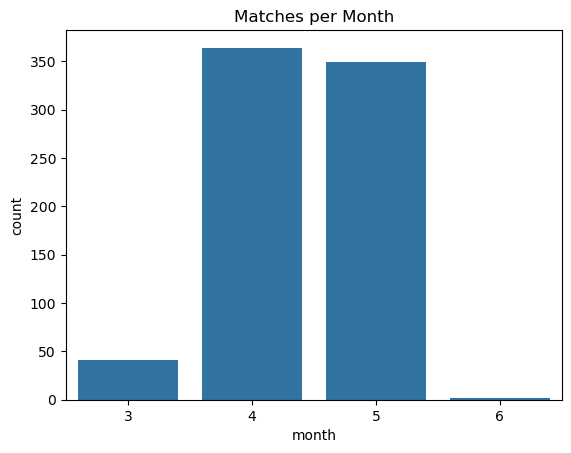

In [41]:
df['date']=pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


sns.countplot(x='month', data=df)
plt.title('Matches per Month')
plt.show()


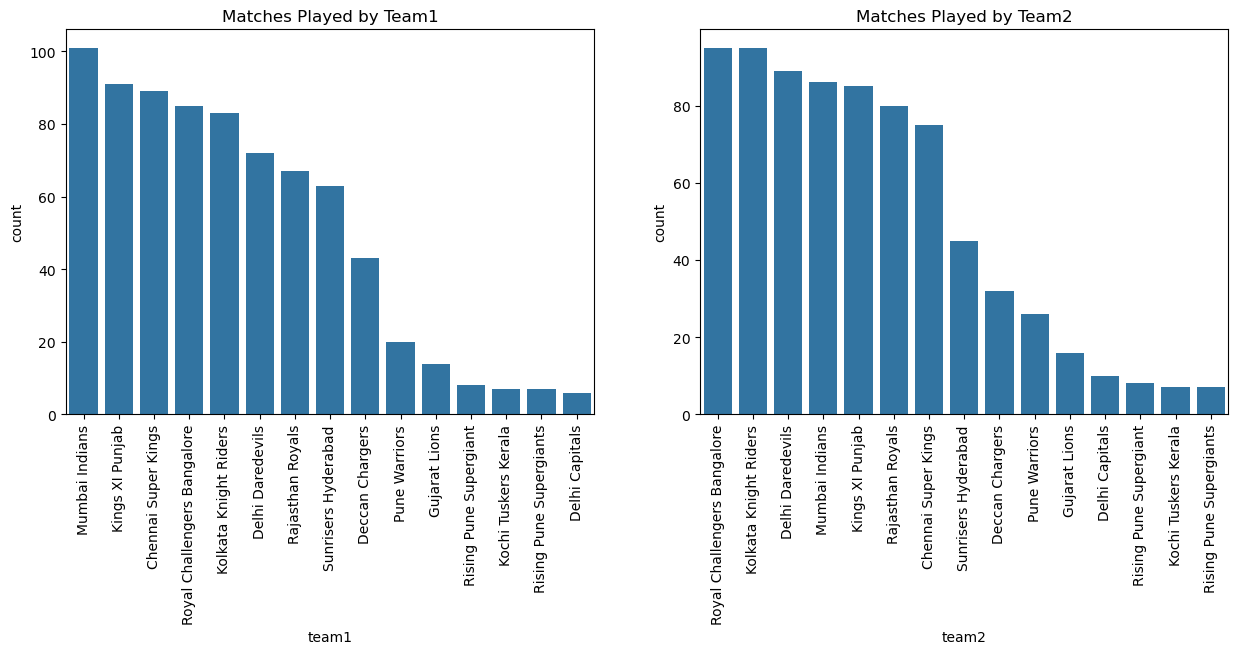

In [49]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(x='team1', data=df, order=df['team1'].value_counts().index)
plt.title('Matches Played by Team1')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='team2', data=df, order=df['team2'].value_counts().index)
plt.title('Matches Played by Team2')
plt.xticks(rotation=90)
plt.show()



In [32]:
team1_counts = df['team1'].value_counts()
team2_counts = df['team2'].value_counts()
total_matches = team1_counts.add(team2_counts, fill_value=0)
team_wins = df['winner'].value_counts()
win_percentage = (team_wins / total_matches) * 100
win_percentage_sorted = win_percentage.sort_values(ascending=False)
print(win_percentage_sorted)

Delhi Capitals                 62.500000
Rising Pune Supergiant         62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
No Result                            NaN
Name: count, dtype: float64


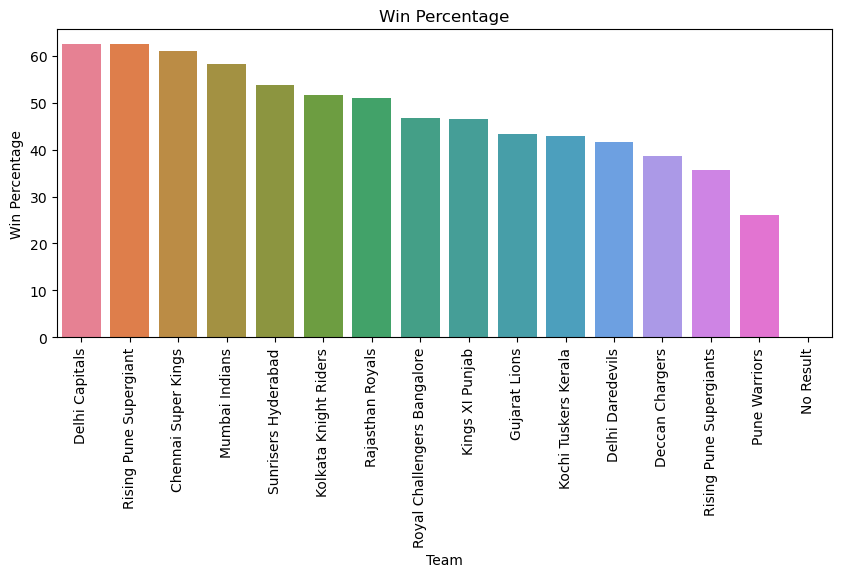

In [33]:
plt.figure(figsize=(10, 4))
sns.barplot(x=win_percentage_sorted.index, y=win_percentage_sorted.values, hue=win_percentage_sorted.index)
plt.title('Win Percentage')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.show()

In [51]:
team1_counts = df['team1'].value_counts()
team2_counts = df['team2'].value_counts()
total_matches = team1_counts.add(team2_counts, fill_value=0)
print(total_matches)

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: count, dtype: int64


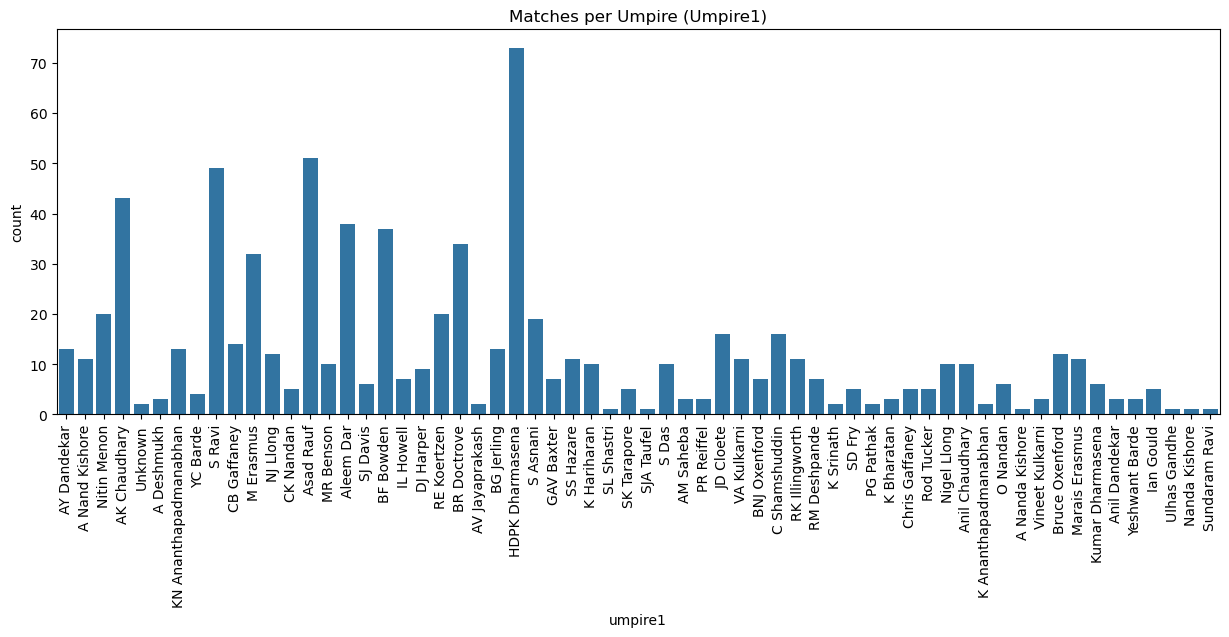

In [64]:
plt.figure(figsize=[15,5])
sns.countplot(x='umpire1', data=df)
plt.title('Matches per Umpire (Umpire1)')
plt.xticks(rotation=90);

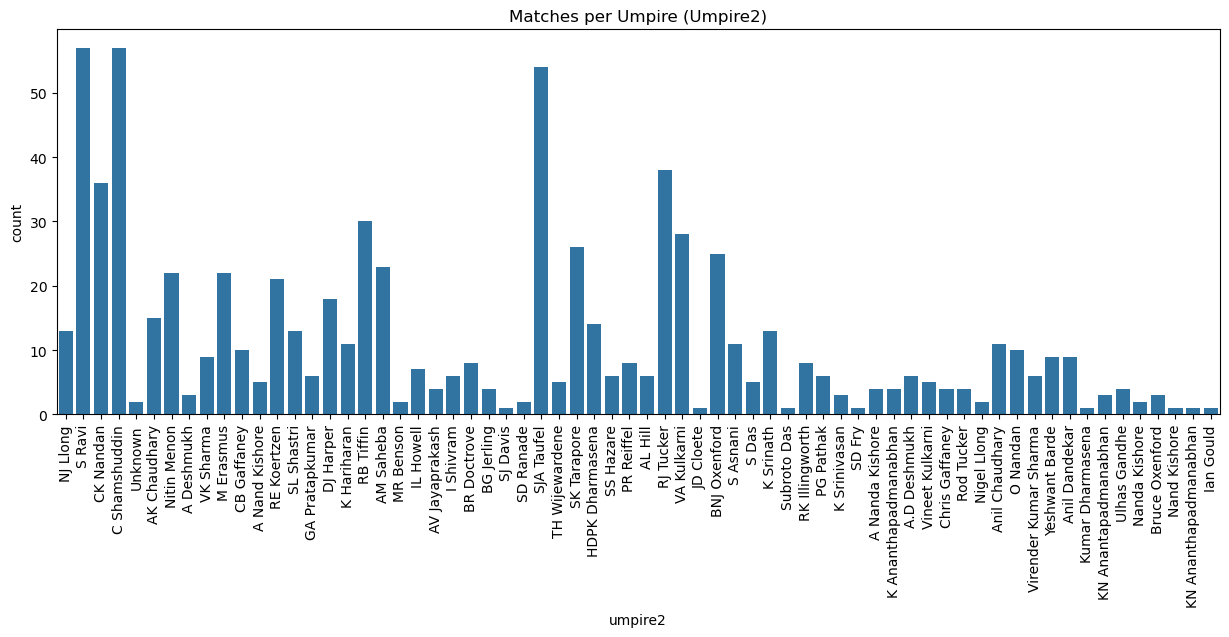

In [66]:
plt.figure(figsize=[15,5])
sns.countplot(x='umpire2', data=df)
plt.title('Matches per Umpire (Umpire2)')
plt.xticks(rotation=90);

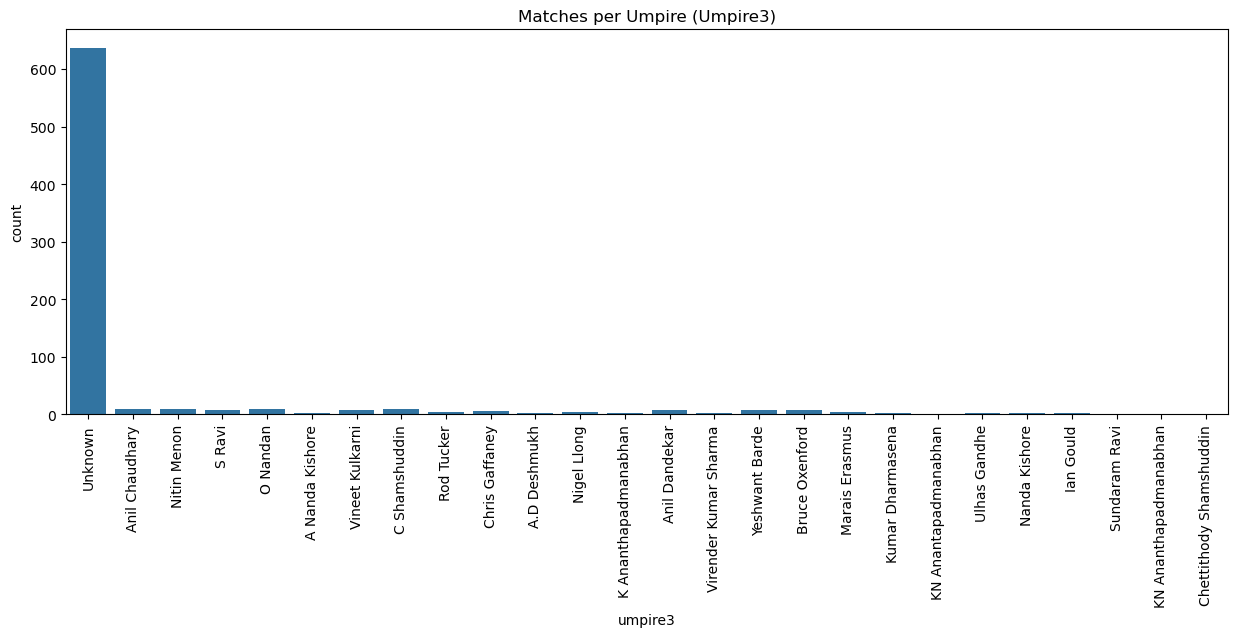

In [68]:
plt.figure(figsize=[15,5])
sns.countplot(x='umpire3', data=df)
plt.title('Matches per Umpire (Umpire3)')
plt.xticks(rotation=90);

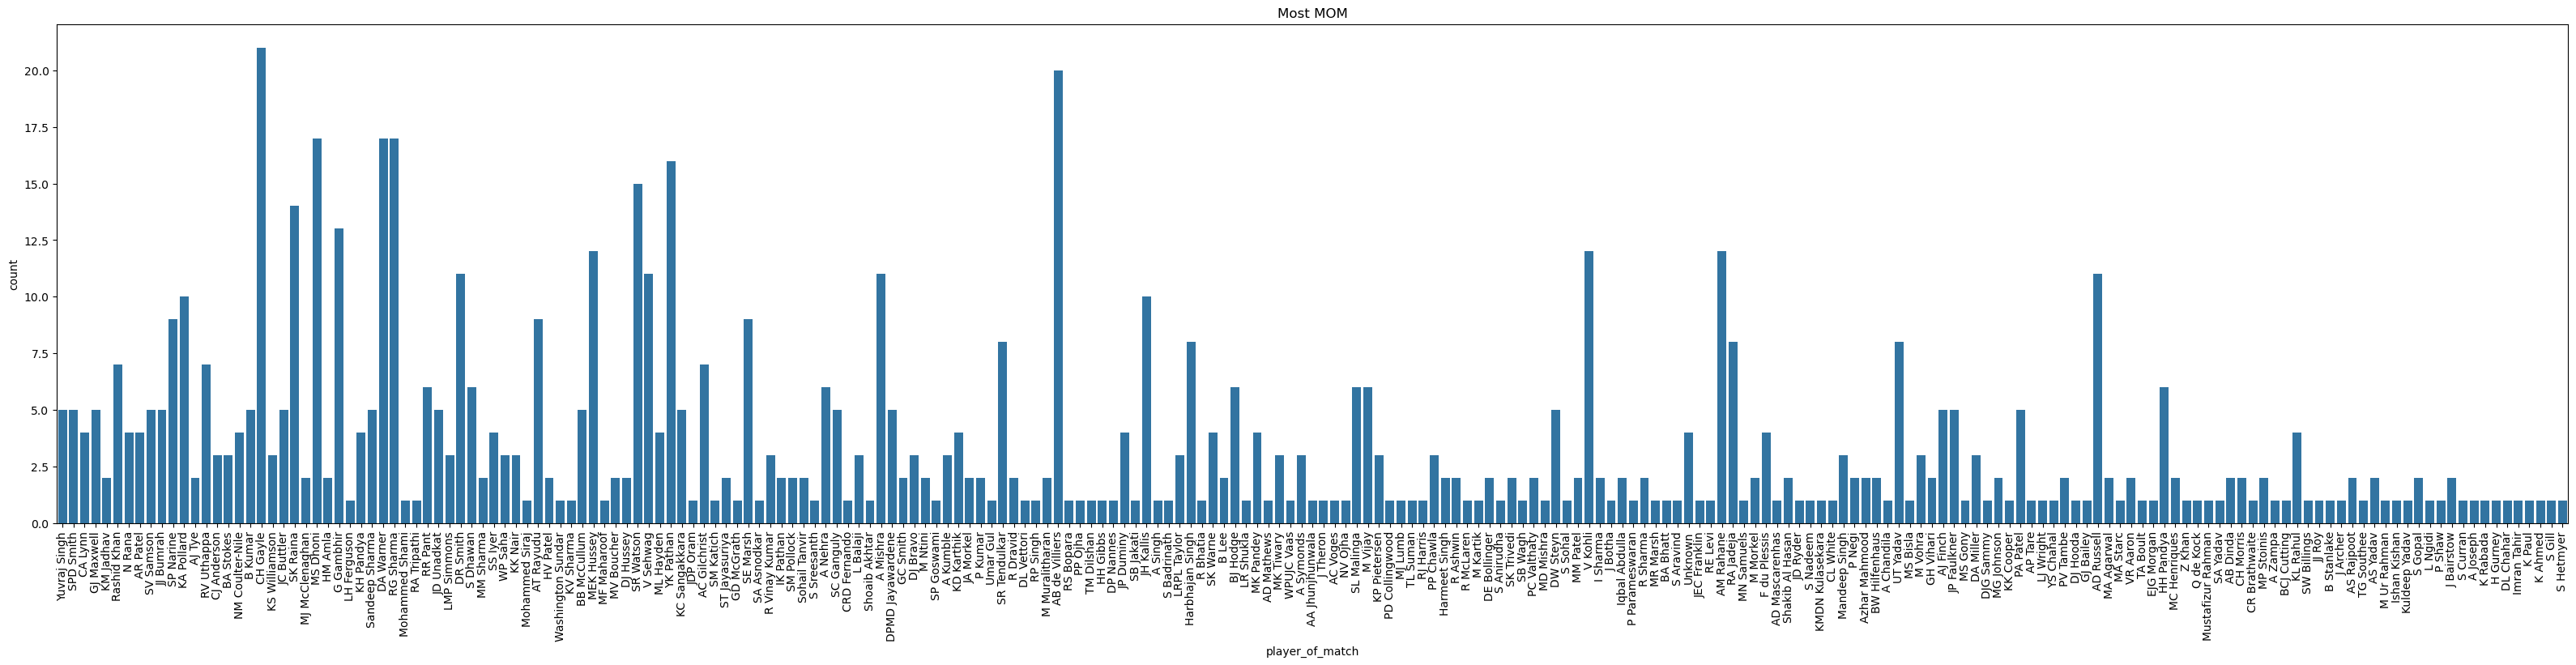

In [74]:
plt.figure(figsize=[40,8])
sns.countplot(x='player_of_match', data=df)
plt.title('Most MOM')
plt.xticks(rotation=90);

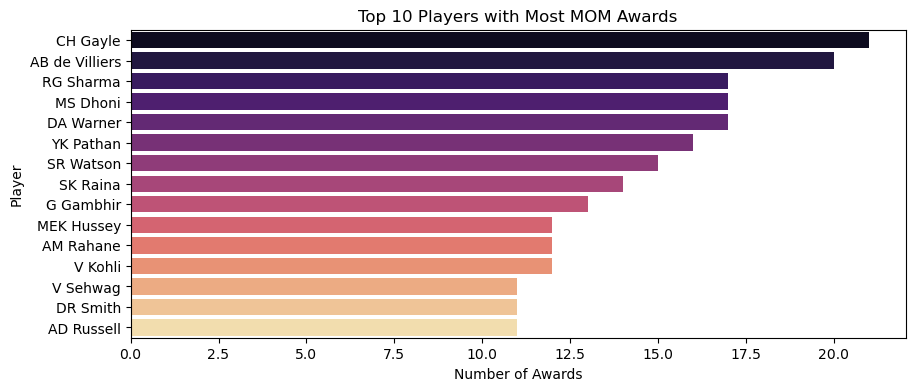

In [35]:
top_players = df['player_of_match'].value_counts().head(15)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_players.values, y=top_players.index, palette='magma')
plt.title('Top 10 Players with Most MOM Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()

In [4]:
toss_winner_also_match_winner = (df['toss_winner'] == df['winner']).sum()
toss_impact_percent = (toss_winner_also_match_winner / len(df)) * 100
print(toss_impact_percent)

51.98412698412699


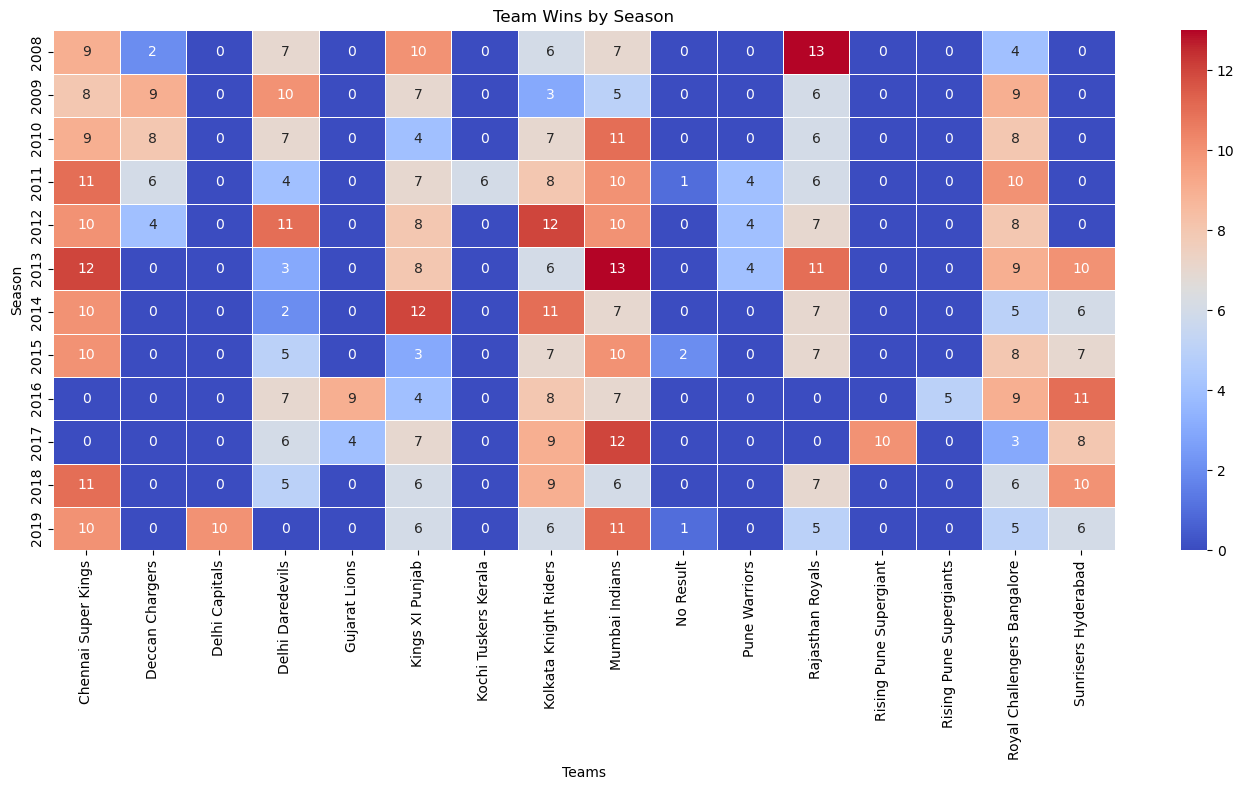

In [6]:
wins_by_season=df.groupby('Season')['winner'].value_counts().unstack().fillna(0).astype(int)
plt.figure(figsize=(14, 8))
sns.heatmap(wins_by_season,cmap='coolwarm', linewidths=.5,annot=True,fmt='d')
plt.title('Team Wins by Season')
plt.xlabel('Teams')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

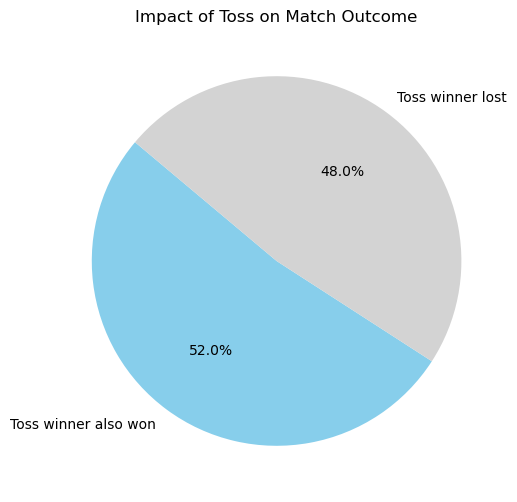

In [8]:
toss_winner_also_match_winner = (df['toss_winner'] == df['winner']).sum()
plt.figure(figsize=(6, 6))
plt.pie([toss_winner_also_match_winner, len(df) - toss_winner_also_match_winner],labels=['Toss winner also won', 'Toss winner lost'],autopct='%1.1f%%',
    colors=['skyblue', 'lightgray'],startangle=140)
plt.title('Impact of Toss on Match Outcome')
plt.show()

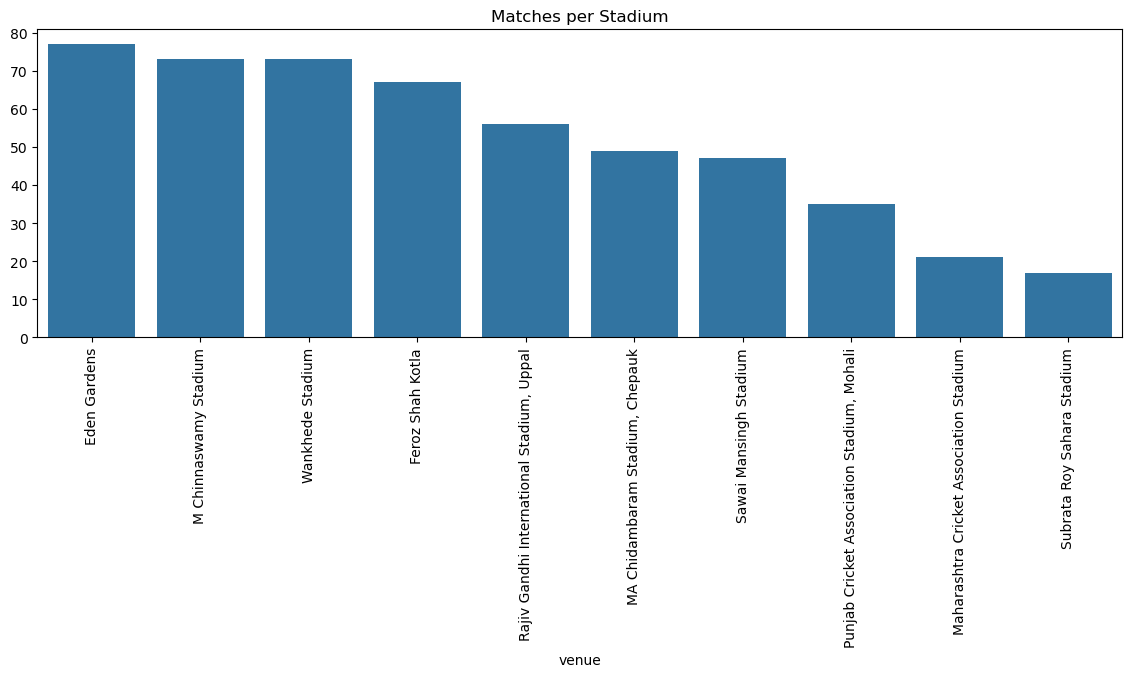

In [23]:
top_venue= df['venue'].value_counts().head(10)
plt.figure(figsize=(14, 4))
sns.barplot(x=top_venue.index,y=top_venue.values)
plt.title('Matches per Stadium')
plt.xticks(rotation=90)
plt.show()

In [22]:
win_counts = df[['venue', 'winner']].value_counts().reset_index()
win_counts.columns = ['venue','team name','wins']
top_teams_per_venue = win_counts.groupby('venue').first().reset_index()
top_teams_per_venue.sort_values(['wins'],ascending=False)


venue  \
8                                        Eden Gardens   
40                                   Wankhede Stadium   
17                              M Chinnaswamy Stadium   
20                    MA Chidambaram Stadium, Chepauk   
32                             Sawai Mansingh Stadium   
9                                    Feroz Shah Kotla   
28          Rajiv Gandhi International Stadium, Uppal   
27         Punjab Cricket Association Stadium, Mohali   
30                       Sardar Patel Stadium, Motera   
26  Punjab Cricket Association IS Bindra Stadium, ...   
2                                   Brabourne Stadium   
18                          M. A. Chidambaram Stadium   
5                          Dr DY Patil Sports Academy   
21            Maharashtra Cricket Association Stadium   
29                 Rajiv Gandhi Intl. Cricket Stadium   
14                                  IS Bindra Stadium   
12       Himachal Pradesh Cricket Association Stadium   
13                             Holkar Cricket Stadium   
37                         Subrata Roy Sahara Stadium   
33   Shaheed Veer Narayan Singh International Stadium   
10                            Feroz Shah Kotla Ground   
15                 JSCA International Stadium Complex   
16                                          Kingsmead   
19                             M. Chinnaswamy Stadium   
23                              New Wanderers Stadium   
31             Saurashtra Cricket Association Stadium   
35                               Sheikh Zayed Stadium   
6   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
1                                    Barabati Stadium   
34                            Sharjah Cricket Stadium   
22                                      Nehru Stadium   
38                                    SuperSport Park   
24                                           Newlands   
11                                         Green Park   
39       Vidarbha Cricket Association Stadium, Jamtha   
7                 Dubai International Cricket Stadium   
36                                   St George's Park   
4                               De Beers Diamond Oval   
25                                    OUTsurance Oval   
3                                        Buffalo Park   
0                                    ACA-VDCA Stadium   

                      team name  wins  
8         Kolkata Knight Riders    45  
40               Mumbai Indians    42  
17  Royal Challengers Bangalore    34  
20          Chennai Super Kings    34  
32             Rajasthan Royals    32  
9              Delhi Daredevils    27  
28          Sunrisers Hyderabad    25  
27              Kings XI Punjab    18  
30             Rajasthan Royals     7  
26              Kings XI Punjab     7  
2                Mumbai Indians     6  
18          Chennai Super Kings     6  
5                Mumbai Indians     5  
21          Chennai Super Kings     5  
29          Sunrisers Hyderabad     5  
14              Kings XI Punjab     5  
12              Kings XI Punjab     5  
13              Kings XI Punjab     4  
37                Pune Warriors     4  
33             Delhi Daredevils     4  
10               Delhi Capitals     4  
15          Chennai Super Kings     3  
16             Delhi Daredevils     3  
19  Royal Challengers Bangalore     3  
23  Royal Challengers Bangalore     3  
31                Gujarat Lions     3  
35             Rajasthan Royals     3  
6           Sunrisers Hyderabad     3  
1         Kolkata Knight Riders     3  
34              Kings XI Punjab     2  
22         Kochi Tuskers Kerala     2  
38              Deccan Chargers     2  
24              Deccan Chargers     2  
11                Gujarat Lions     2  
39              Deccan Chargers     2  
7           Sunrisers Hyderabad     2  
36               Mumbai Indians     2  
4           Chennai Super Kings     1  
25             Delhi Daredevils     1  
3           Chennai Super Kings     1  
0           C

In [30]:
team_venue_wins=df[['winner','venue']].value_counts().reset_index()
team_venue_wins.columns = ['team name','venue','wins']
best_ground_for_team = team_venue_wins.groupby('team name').first().reset_index()
best_ground_for_team = best_ground_for_team[['team name', 'wins', 'venue']]
best_ground_for_team

team name  wins  \
0           Chennai Super Kings    34   
1               Deccan Chargers     3   
2                Delhi Capitals     4   
3              Delhi Daredevils    27   
4                 Gujarat Lions     3   
5               Kings XI Punjab    18   
6          Kochi Tuskers Kerala     2   
7         Kolkata Knight Riders    45   
8                Mumbai Indians    42   
9                     No Result     2   
10                Pune Warriors     4   
11             Rajasthan Royals    32   
12       Rising Pune Supergiant     5   
13      Rising Pune Supergiants     2   
14  Royal Challengers Bangalore    34   
15          Sunrisers Hyderabad    25   

                                                venue  
0                     MA Chidambaram Stadium, Chepauk  
1                                    Barabati Stadium  
2                             Feroz Shah Kotla Ground  
3                                    Feroz Shah Kotla  
4              Saurashtra Cricket Association Stadium  
5          Punjab Cricket Association Stadium, Mohali  
6                                       Nehru Stadium  
7                                        Eden Gardens  
8                                    Wankhede Stadium  
9                               M Chinnaswamy Stadium  
10                         Subrata Roy Sahara Stadium  
11                             Sawai Mansingh Stadium  
12            Maharashtra Cricket Association Stadium  
13  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...  
14                              M Chinnaswamy Stadium  
15          Rajiv Gandhi International Stadium, Uppal